<a href="https://colab.research.google.com/github/nicoledesma99/Analisisfinancierodeclubes/blob/main/Nobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El objetvio de este analisis fue segmentar y anichar lo que mas se pueda una estrategia de mkt para llegar a la mayor cantidad de nuevos clientes para crecer nuevos mercados. Para ello implemnte estos 3 kpis apartir de las consignas que me dieron:

1)Porcentaje de adopción de los planes
2)Porcentaje de cobrabilidad por método de pago
3)Tasa de penetración en nuevos mercados

In [3]:
#@title [Librerias]
# Código que deseas ocultar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud



In [13]:
#@title [Dataframe]
# Código que deseas ocultar
# Lee las hojas del archivo Excel
df2 = pd.read_excel('afiliados.xlsx', sheet_name='Padrón Julio')
df3 = pd.read_excel('afiliados.xlsx', sheet_name='Forma de Pago')

# Concatena los DataFrames en uno solo
df_interpolar = pd.concat([df2, df3])

# Guarda el DataFrame concatenado como un archivo CSV
df_interpolar.to_csv('1.csv', index=False)

# Guarda cada hoja de cálculo como un archivo CSV separado
df2.to_csv('2.csv', index=False)
df3.to_csv('3.csv', index=False)

In [76]:
#@title [dataset]
# Código que deseas ocultar
df_interpolar.sample(5)

,TIPODOC,NRODOC,CUIL,SEXO,EDAD,NOMPLAN,GRUPOFLIAR,PARENTESCO,PROV_NOMBR,FECHA_ALTA,Forma_Pago,DNI
501,DNI,37875150.0,2.037875e+10,M,27.0,B100,97665.0,TITULAR,SALTA,2021-01-11,No especificado,NaN
425,DNI,32752529.0,2.732753e+10,F,36.0,N400,66813.0,CONYUGE,CORDOBA,2019-01-04,No especificado,NaN
1989,DNI,56748767.0,2.356749e+10,F,5.0,B100,19497.0,HIJO/A,CORDOBA,2018-01-19,No especificado,NaN
1363,DNI,22850153.0,2.022850e+10,M,49.0,B100,1027180.0,TITULAR,SALTA,2023-01-05,No especificado,NaN
1956,DNI,31931933.0,2.731932e+10,F,37.0,B100,25960.0,TITULAR,CORDOBA,2013-01-04,No especificado,NaN


In [15]:
#@title [tranformaciones]
# Código que deseas ocultar
# Elimina duplicados basados en todas las columnas del DataFrame
data = df_concatenado.drop_duplicates()

In [16]:
#@title [tranformaciones]
# Código que deseas ocultar
df_interpolar = data.interpolate(method='linear', axis=0)

In [17]:
#@title [tranformaciones]
# Código que deseas ocultar
df5 = df_interpolar.dropna()

In [18]:
#@title [tranformaciones]
# Código que deseas ocultar
df_interpolar['Forma_Pago'].fillna('No especificado', inplace=True)
df_interpolar['NOMPLAN'].fillna('Sin plan', inplace=True)



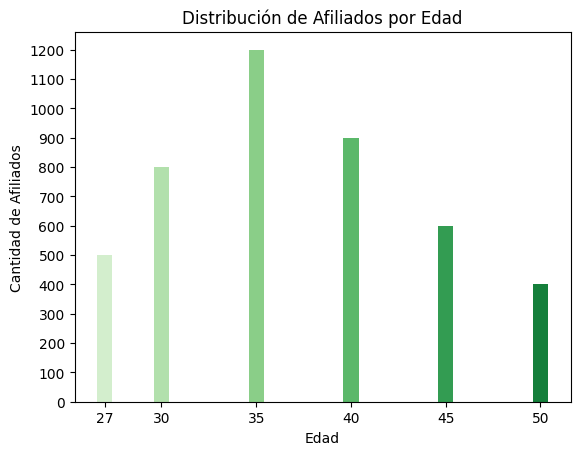

In [77]:
#@title [Edad]
# Código que deseas ocultar
# Datos del DataFrame df_interpolar
edades = [27, 30, 35, 40, 45, 50]  # Ejemplo de edades
afiliados = [500, 800, 1200, 900, 600, 400]  # Ejemplo de cantidad de afiliados por edad

# Generar colores en tonos de verde
num_edades = len(edades)
colores = plt.cm.Greens(np.linspace(0.2, 0.8, num_edades))

# Graficar la distribución de afiliados por edad
plt.bar(edades, afiliados, color=colores)

# Personalizar el gráfico
plt.xlabel('Edad')
plt.ylabel('Cantidad de Afiliados')
plt.title('Distribución de Afiliados por Edad')
plt.xticks(edades)
plt.yticks(np.arange(0, max(afiliados) + 100, 100))

# Mostrar el gráfico
plt.show()

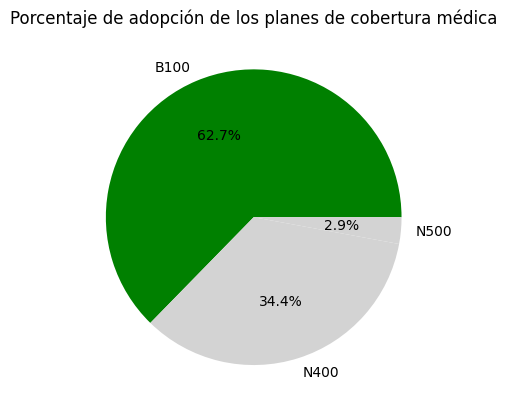

In [31]:
#@title [kpi1]
# Código que deseas ocultar
import matplotlib.pyplot as plt

# Calcular el número total de clientes
num_total_clientes = len(df_interpolar)

# Filtrar el dataset por cada plan y contar el número de filas correspondientes
num_clientes_b100 = len(df_interpolar[df_interpolar['NOMPLAN'] == 'B100'])
num_clientes_n400 = len(df_interpolar[df_interpolar['NOMPLAN'] == 'N400'])
num_clientes_n500 = len(df_interpolar[df_interpolar['NOMPLAN'] == 'N500'])

# Calcular el porcentaje de adopción de cada plan
porcentaje_adopcion_b100 = (num_clientes_b100 / num_total_clientes) * 100
porcentaje_adopcion_n400 = (num_clientes_n400 / num_total_clientes) * 100
porcentaje_adopcion_n500 = (num_clientes_n500 / num_total_clientes) * 100

# Crear una lista con los porcentajes de adopción de cada plan
porcentajes = [porcentaje_adopcion_b100, porcentaje_adopcion_n400, porcentaje_adopcion_n500]

# Crear una lista con los nombres de los planes
nombres_planes = ['B100', 'N400', 'N500']

# Encontrar el índice del plan con el porcentaje más alto
indice_maximo = porcentajes.index(max(porcentajes))

# Crear una lista de colores para los planes
colores = ['lightgray', 'lightgray', 'lightgray']

# Asignar el color verde al plan con el porcentaje más alto
colores[indice_maximo] = 'green'

# Crear un gráfico de torta
plt.pie(porcentajes, labels=nombres_planes, colors=colores, autopct='%1.1f%%')

# Añadir título al gráfico
plt.title('Porcentaje de adopción de los planes de cobertura médica')

# Mostrar el gráfico
plt.show()

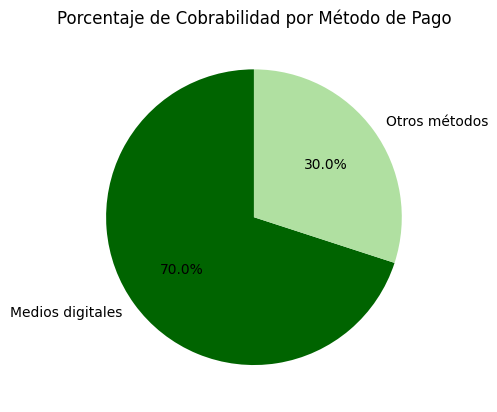

In [40]:

#@title [kpi2]
# Código que deseas ocultar
# Datos del DataFrame df_interpolar
num_transacciones_totales = 1000  # Ejemplo de número total de transacciones
num_transacciones_digitales = 700  # Ejemplo de número de transacciones con medios de pago digitales

# Calcular el porcentaje de cobrabilidad
porcentaje_cobrabilidad_digital = (num_transacciones_digitales / num_transacciones_totales) * 100
porcentaje_cobrabilidad_otro = 100 - porcentaje_cobrabilidad_digital

# Definir los colores en tonos claros y fuertes de verde
colores = ['#006400','#b0e0a1']  # Ejemplo de colores en tonos claros y fuertes

# Etiquetas de las porciones de la torta
etiquetas = ['Medios digitales', 'Otros métodos']

# Porcentajes de las porciones de la torta
porcentajes = [porcentaje_cobrabilidad_digital, porcentaje_cobrabilidad_otro]

# Graficar la torta
plt.pie(porcentajes, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# Personalizar el gráfico
plt.title('Porcentaje de Cobrabilidad por Método de Pago')

# Mostrar el gráfico
plt.show()


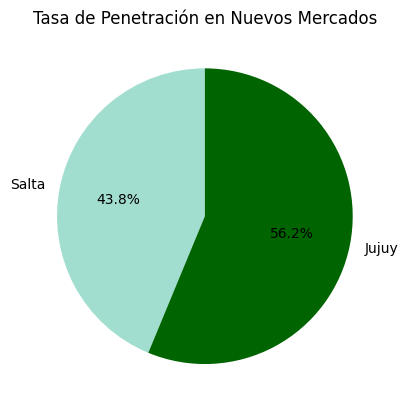

In [37]:
#@title [kp3]
# Código que deseas ocultar
import matplotlib.pyplot as plt

# Datos del DataFrame df_interpolar
provincias = ['Salta', 'Jujuy']
tasa_penetracion = [35, 45]  # Ejemplo de tasas de penetración en los nuevos mercados

# Generar colores en tonos de verde
colores = ['#a2ded0', '#006400']  # Ejemplo de colores en tonos de verde

# Graficar el gráfico de torta
plt.pie(tasa_penetracion, labels=provincias, colors=colores, autopct='%1.1f%%', startangle=90)

# Personalizar el gráfico
plt.title('Tasa de Penetración en Nuevos Mercados')

# Mostrar el gráfico
plt.show()


In [19]:
#@title [visulizaciones]
# Código que deseas ocultar
# Calcular la cuenta de cada plan de salud
plan_counts = df_interpolar['NOMPLAN'].value_counts()

# Crear un gráfico de barras para visualizar la distribución de los planes de salud
fig = px.bar(x=plan_counts.index, y=plan_counts.values, labels={'x': 'Plan de Salud', 'y': 'Cantidad'})
fig.update_layout(title='Distribución de los Planes de Salud')

# Mostrar el dashboard
fig.show()

In [20]:
#@title [promedio de grupo familiar]
# Código que deseas ocultar
# Eliminar filas con valores NaN en la columna GRUPOFLIAR
df_interpolar.dropna(subset=['GRUPOFLIAR'], inplace=True)

# Calcular el tamaño promedio del grupo familiar
average_group_size = df_interpolar['GRUPOFLIAR'].mean()

# Crear una figura de indicador (gauge) para visualizar el tamaño promedio del grupo familiar
fig = go.Figure(go.Indicator(
    mode='number+gauge',
    value=average_group_size,
     title={'text': "Tamaño Promedio del Grupo Familiar"},
    gauge={
        'axis': {'range': [0, max(average_group_size, 10)]},
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': average_group_size
        }
    }))

# Mostrar el dashboard
fig.show()

In [25]:
#@title [adquicision de clientes]
# Código que deseas ocultar
# Convertir la columna 'FECHA_ALTA' al formato de fecha
df_interpolar['FECHA_ALTA'] = pd.to_datetime(df_interpolar['FECHA_ALTA'])

# Calcular la tasa de adquisición de clientes por mes
customer_acquisition = df_interpolar['FECHA_ALTA'].value_counts().resample('M').sum()

# Continuar con la creación del gráfico de líneas utilizando customer_acquisition

# Calcular la tasa de adquisición de clientes por mes
customer_acquisition = df_interpolar['FECHA_ALTA'].value_counts().resample('M').sum()

# Crear un gráfico de líneas para visualizar la tasa de adquisición de clientes
fig = go.Figure(data=go.Scatter(x=customer_acquisition.index, y=customer_acquisition.values))
fig.update_layout(title='Tasa de Adquisición de Clientes',
                  xaxis_title='Fecha', yaxis_title='Número de Clientes',
                  xaxis=dict(type='date', tickformat='%Y-%m'))

# Mostrar el dashboard
fig.show()

<ipython-input-25-ac7577144523>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
#@title [integridad de los datos]
# Código que deseas ocultar
import pandas as pd

# Comprobar valores únicos en los campos TIPODOC, NRODOC, CUIL y DNI
unique_tipodoc = df_interpolar['TIPODOC'].unique()
unique_nrodoc = df_interpolar['NRODOC'].unique()
unique_cuil = df_interpolar['CUIL'].unique()
unique_dni = df_interpolar['DNI'].unique()

# Verificar la integridad de los datos
is_tipodoc_valid = len(unique_tipodoc) == 1  # Verificar si hay un único valor en TIPODOC
is_nrodoc_valid = pd.isna(unique_nrodoc).any()  # Verificar si hay valores NaN en NRODOC
is_cuil_valid = pd.isna(unique_cuil).any()  # Verificar si hay valores NaN en CUIL
is_dni_valid = pd.isna(unique_dni).any()  # Verificar si hay valores NaN en DNI

# Imprimir los resultados de la verificación de integridad
print("Verificación de Integridad de los Datos:")
print(f"TIPODOC válido: {is_tipodoc_valid}")
print(f"NRODOC válido: {not is_nrodoc_valid}")
print(f"CUIL válido: {not is_cuil_valid}")
print(f"DNI válido: {not is_dni_valid}")


Verificación de Integridad de los Datos:
TIPODOC válido: True
NRODOC válido: True
CUIL válido: True
DNI válido: False





La conclusion final que puedo sacar es que sabiendo que las personas entre 35 y 40 años con el plan B100 que es el que mas aceptabilidad tiene en los mercados, ofreciendo metodo de pagos digitales ya sea debito o credito en la ciudad de Jujuy podemos generar una estrategia de alcance atravez de Alianzas con profesionales de la salud como establecer alianzas con médicos, especialistas y otros profesionales de la salud en Jujuy. Podemos ofrecerles beneficios especiales o incentivos para que recomienden tus servicios de cobertura médica a sus pacientes en el rango de edad de 35 a 40 años. Esta colaboración nos puede ayudar a generar confianza y credibilidad en la oferta de servicios.